In [1]:
#필요 라이브러리 로드
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Data 1. Weather Station Locations
- WBN : 기상 관측소 번호
- NAME : 기상 관측소 이름
- STATE/COUNTRY ID : 나라의 두문자어
- Latitude : 기상 관측소 위도
- Longitude : 기상 관측소 경도

In [2]:
#데이터 로드 1.  Weater Station Locations
weather_station_location = pd.read_csv('./Weather Station Locations.csv')

weather_station_location.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


## Data 2. Weather
- STA : WBAN 기상관측소 번호
- Data : 기온 측정 날짜
- MeanTemp : 평균 기온

In [3]:
#데이터 로드 2.  Summary of Weather
weather = pd.read_csv('./Summary of Weather.csv')

weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 분석에 필요한 컬럼만 필터링

In [4]:
weather_station_location = weather_station_location.loc[:,['WBAN','NAME','STATE/COUNTRY ID','Latitude','Longitude']]
weather = weather.loc[:,['STA','Date','MeanTemp']]

### 지역명이 BINDUKURI인 데이터의 일 평균 온도를 분석 대상으로 지정

In [5]:
#BINDUKURI 지역의 관측소 번호 가져오기
weather_station_id = weather_station_location[weather_station_location.NAME == 'BINDUKURI'].WBAN

#기온 데이터에서 BINDUKURI 관측소 번호와 일치하는 데이터만 추출
weather_bin = weather[weather.STA == int(weather_station_id)]

In [6]:
#기온 데이터에서 날짜 데이터를 datetime 형태로 데이터 타입 변경
weather_bin['Date'] = pd.to_datetime(weather_bin['Date'])

In [7]:
#데이터 확인
weather_bin

,STA,Date,MeanTemp
78252,32907,1943-05-11,28.888889
78253,32907,1943-05-12,25.555556
78254,32907,1943-05-13,24.444444
78255,32907,1943-05-14,23.888889
78256,32907,1943-05-15,27.777778
...,...,...,...
78998,32907,1945-05-27,23.333333
78999,32907,1945-05-28,25.555556
79000,32907,1945-05-29,24.444444
79001,32907,1945-05-30,25.555556


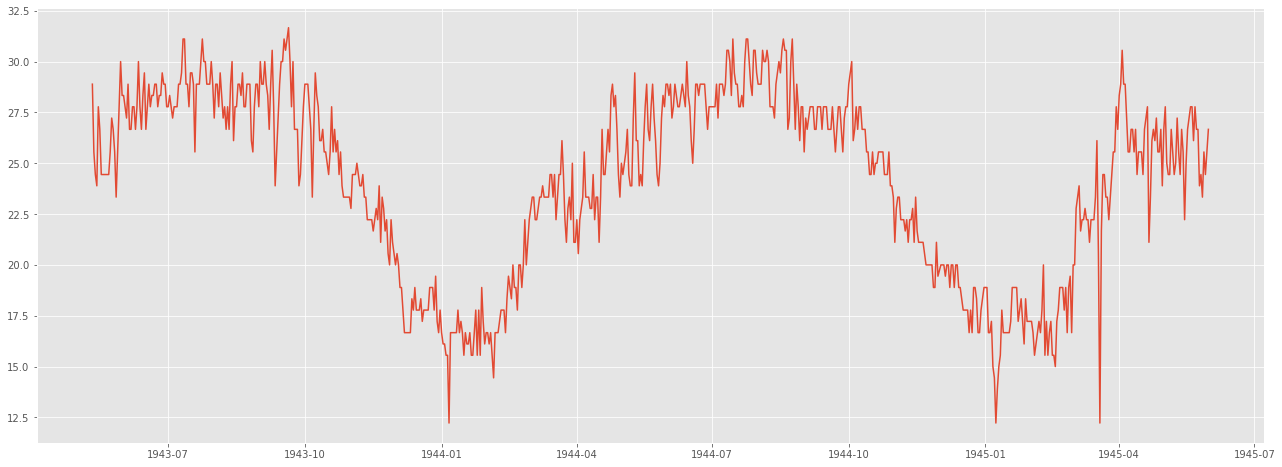

In [8]:
#그래프로 데이터 확인
plt.figure(figsize=(22,8))
plt.plot(weather_bin.Date, weather_bin.MeanTemp)
plt.show()

In [9]:
#시계열 형태의 ts 데이터 생성 -- 날짜 데이터를 인덱스로 지정
timeSeries = weather_bin.loc[:, ['Date','MeanTemp']]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop('Date', axis=1)

#데이터 확인
ts

,MeanTemp
Date,
1943-05-11,28.888889
1943-05-12,25.555556
1943-05-13,24.444444
1943-05-14,23.888889
1943-05-15,27.777778
...,...
1945-05-27,23.333333
1945-05-28,25.555556
1945-05-29,24.444444


### <span style='color:red'> 시계열 데이터 요소 추출 (Trend, Seasonal, Residual) </span>
- seasonal_decompose()
  - model = 'additive' or 'multiplicative' (덧셈 분해 or 곱셈 분해)
  - period 들어가는 주기는 '계절성 주기를 기반으로 설정'
    - 분기별 데이터는 4, 월별 데이터는 12, 주별 패턴이 있는 일별 데이터는 7로 초기 설정 후 맞춰가는 것이 필요



<Figure size 432x288 with 0 Axes>

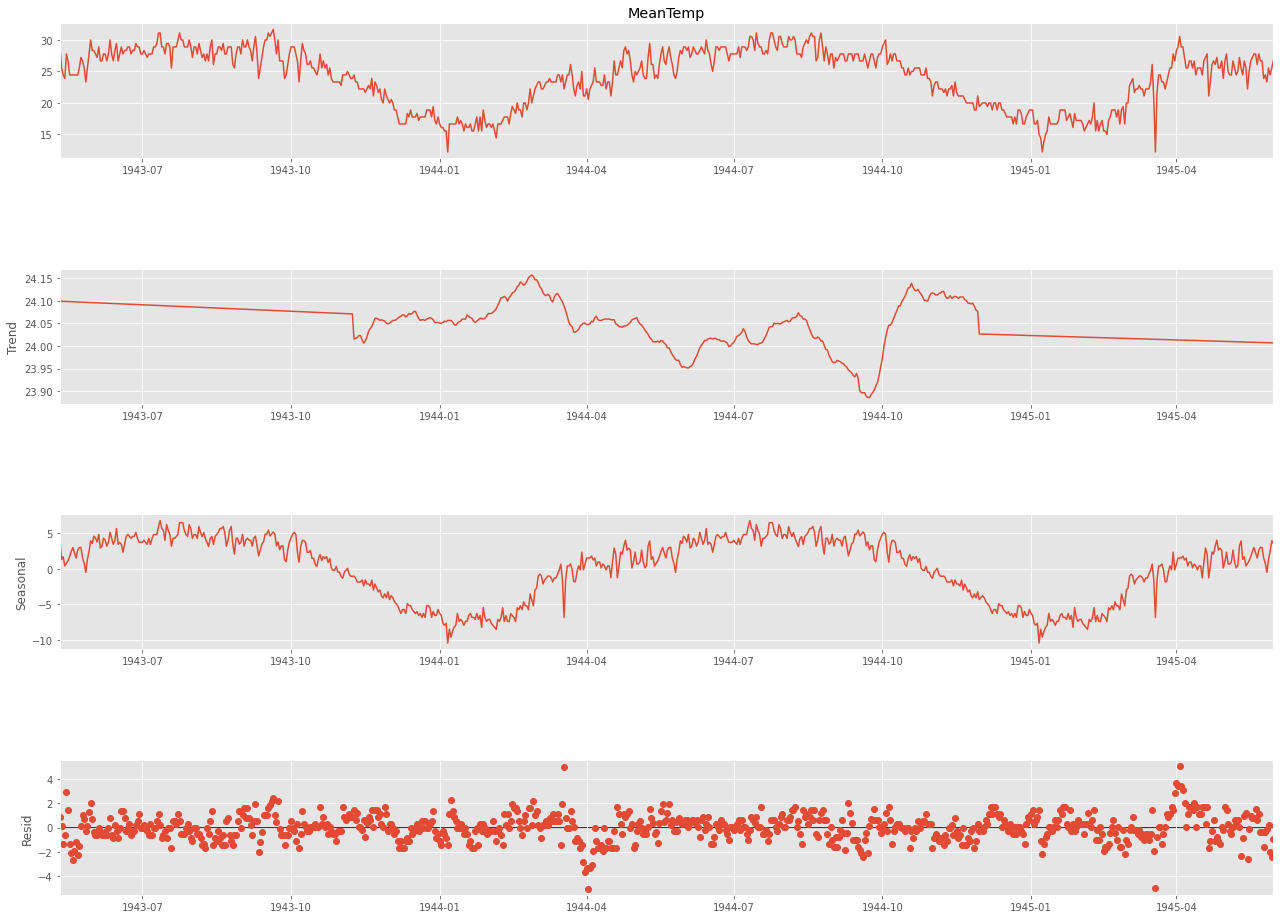

In [16]:
#시계열 데이터 분석
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts['MeanTemp'], model = 'additive', extrapolate_trend='freq', period=365)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

### 데이터의 패턴이 보이면 '정상성'을 의심해봐야 한다.


### <span style='color:red'> 정상성 판단을 위한 ACF 그래프</span>
- ACF (Autocorrelation Function) : 자기 상관 함수
  - Autocorrelation = 0 이면 자기상관이 없음
  - 현재의 y값과 과거의 y값의 상관성을 비교
    - sm.graphics.tsa.plot_acf(시계열데이터(y), lags=lags, use_vlines=True)
    - lags : 데이터상 과거의 몇 번째 뒤의 데이터와 현재 데이터를 비교할 것인지
    - use_vlines = True : 디폴트 , 범위표현
  - 정상성을 만족하는 시계열은 상대적으로 빠르게 0에 수렴한다.
  - 비정상 시계열은 천천히 감소하고, 종종 큰 양의 값을 가진다.

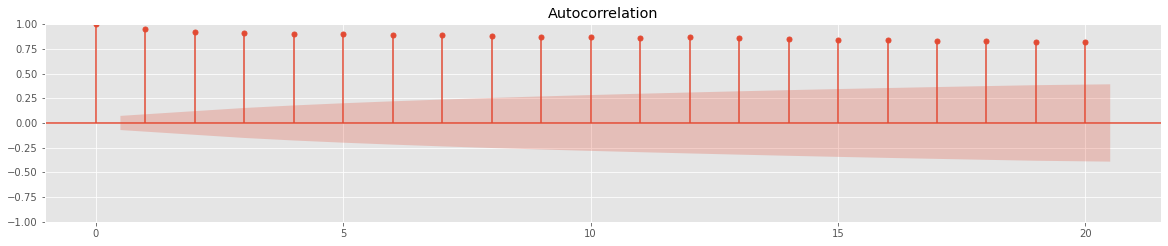

In [17]:
# 정상성 판단을 위해 ACF 그래프 확인 -- 매우 천천히 값이 감소하므로, 정상성을 만족하지 못하는 것으로 예상됨
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)

## ADF(Augmented Dickey-Fuller) 검정을 이용한 정상성 확인
- adfuller()
  - result[0] : ADF Statistic
  - result[1] : p-value
  - result[2] : Lag
  - result[3] : observation
  - result[4] : Critical Values

In [19]:
# 단위근 검정인 ADF 검정
# H0(귀무가설) : 정상성을 만족하지 않는다. -- 자료에 단위근이 존재한다.
# H1(대립가설) : 정상성을 만족한다.

from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)


print('result[0] : ',result[0])
print('result[1] : ',result[1])
print('result[2] : ',result[2])
print('result[4] : ',result[4])

# p-values가 0.05를 넘으므로, 귀무가설을 기각하지 못하여 '정상성을 만족하지 못한다'

result[0] :  -1.4095966745887554
result[1] :  0.5776668028526454
result[2] :  11
result[4] :  {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


### <span style='color:red'> 정상성 해결을 위한 '차분' </span>

In [20]:
# 1차 차분 : 현재 시점의 데이터에서 한 단계 이전 시점의 데이터를 빼줌
ts_diff = ts - ts.shift()

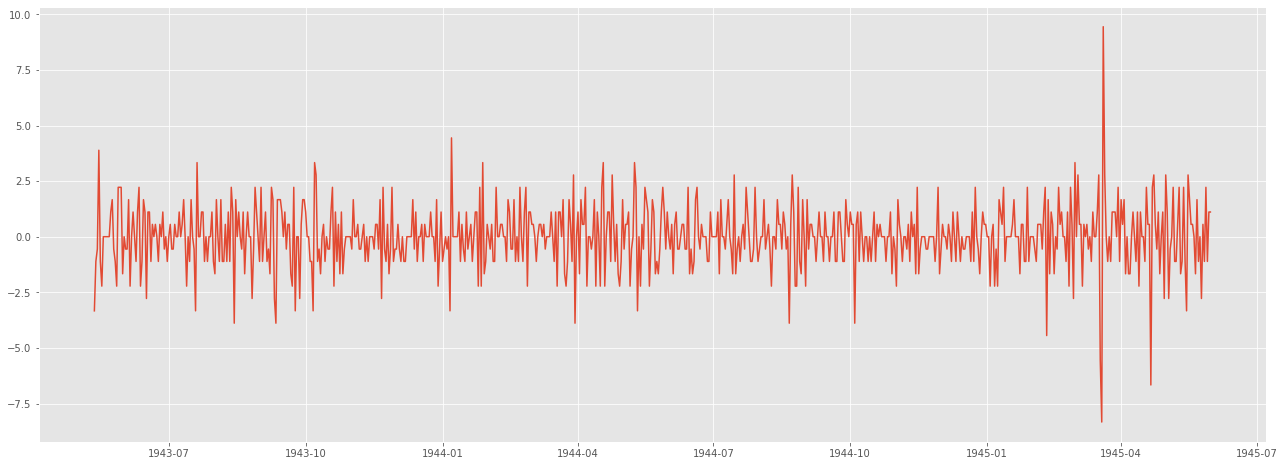

In [21]:
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.show()

In [22]:
# ADF 검정

result = adfuller(ts_diff[1:])

#result[0] : ADF Statistic,  result[1] : p-value,  result[4] : Critical Values
print('result[0] : ',result[0])
print('result[1] : ',round(result[1], 10))
print('result[2] : ',result[4])

#p-value가 0.05보다 작으므로, 귀무가설을 기각하여 '정상성을 만족한다'

result[0] :  -11.67895557510531
result[1] :  0.0
result[2] :  {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


## ARIMA 모형의 p, q를 결정하기 위한 ACF, PACF 그래프
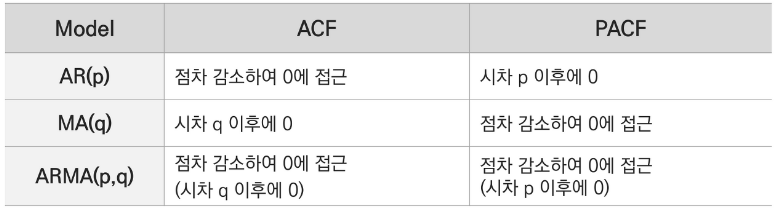

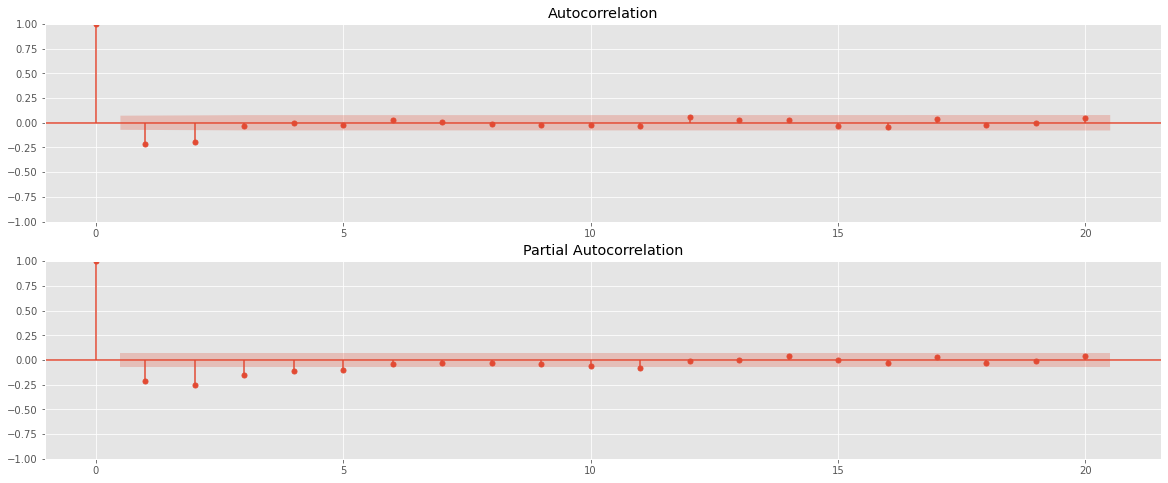

In [23]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags=20, ax=ax2)

#ACF, PACF 모두 빠르게 0에 수렴

## ARIMA(2,1,2) 모델

- ARIMA(p,d,q) 모형
  - d차 차분한 데이터에 AR(p)모형과 MA(q)모형을 합친 모형
  - AR(p) = ARIMA(p,0,0), MA(q) = ARIMA(0,0,q)
  - p는 PACF, q는 ACF 그래프를 그려서 확인한다.

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

#fit model 
model = ARIMA(ts, order=(2,1,2))
model_fit = model.fit()

C:\Users\soyoung\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\soyoung\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\soyoung\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [25]:
#predict
start_index = datetime(1944,6,25)
end_index = datetime(1945,5,31)

forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')
#차분이 들어간 모델의 경우, typ = 'levels'로 설정해 주어야한다.
#설정하지 않을 경우 디폴트인 linear로 설정이 되고, 이 경우 차분한 값에 대한 결과가 나옴
#start : 예측을 시작할 인덱스
#end : 예측할 마지막 인덱스

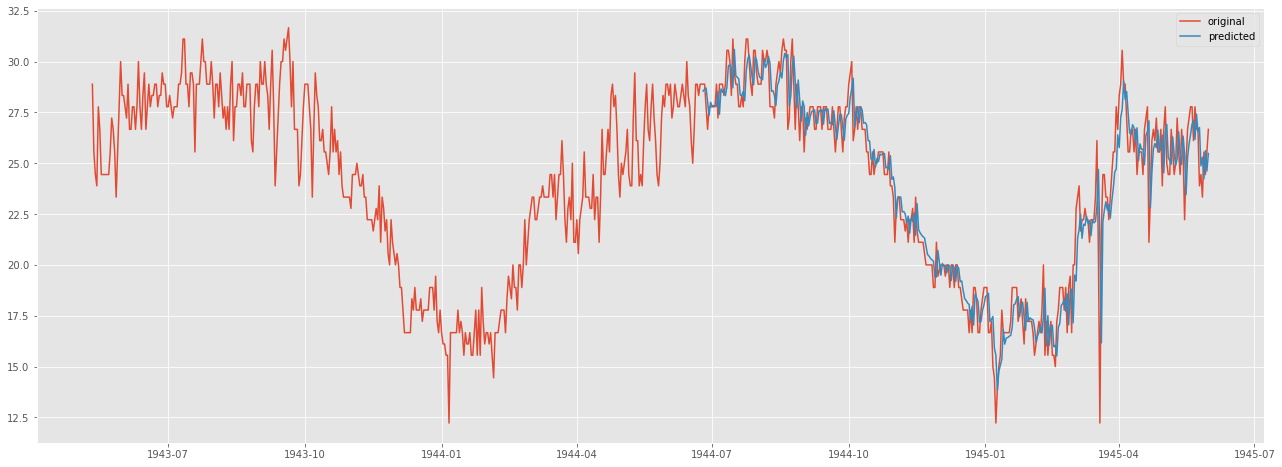

In [29]:
#visualization
plt.figure(figsize=(22,8))
plt.plot(weather_bin.Date, weather_bin.MeanTemp, label='original')
plt.plot(forecast, label='predicted')
plt.legend()
plt.show()

## <span style='color:blue'> 성능 확인 </span>
- R2 score (R-squared) : 결정계수
  - 상관계수를 제곱한 값
  - 회귀모델에서 <span style='color:black; background-color:#f6f8fa'>'독립변수'</span>가 <span style='color:black; background-color:#f6f8fa'>'종속변수'</span>를 얼마나 잘 설명해주는지 보여주는 지표
  - 1에 가까울 수록 성능이 좋음
- MAE (Mean Absolute Error)
  - 오차의 절대값을 모두 더하여 평균
- MSE (Mean Squared Error)
  - 오차의 제곱을 모두 더하여 평균
- RMSE (Root Mean Squared Error)
  - MSE에 루트를 씌운 값
- MAPE (Mean Absolute Percentage Error)
  - 오차가 예측값에서 차지하는 정도를 나타낸 지표로, 퍼센트값을 가짐


In [ ]:
from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0,1], 3)
    mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred)*100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    
    df = pd.DataFrame({
        'R2':r2,
        'Corr':corr,
        'RMSE':rmse,
        'MAPE':mape},
    index=[0])
    
    return df

In [31]:
scoring(np.array(weather_bin[weather_bin.Date>=start_index].MeanTemp), np.array(forecast))

,R2,Corr,RMSE,MAPE
0,91.018,0.954,1.365,4.449
